# Information
There is peak information, but I'm just going to just look at the mean information to start with

# File Setup

In [1]:
import numpy as np
import pandas as pd
import netCDF4
import math
import matplotlib
import matplotlib.pyplot as plt 
import sys
import os
import IPython
import itertools
import cartopy
import xarray as xr

# Load the Data

In [2]:
weblink =\
"http://data-cbr.csiro.au/thredds/dodsC/catch_all/CMAR_CAWCR-Wave_archive/CAWCR_Wave_Hindcast_1979-2010/gridded/ww3.pac_4m.201012.nc"
# "http://thredds.aodn.org.au/thredds/dodsC/CSIRO/Climatology/COWCLIP2/global/CSIRO/{}/rcp{}/r1i1p1/glob/v201908/mon/{}/{}_glob_CSIRO_{}_rcp{}_r1i1p1_mon_208101-209912.nc".format(row['clim_model'],row['rcp'],row['var'],row['var'],row['clim_model'],row['rcp'])

ds = netCDF4.Dataset(weblink)


In [3]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    product_name: ww3.pac_4m.201012.nc
    area: Pacific 4 min wave grid
    latitude_resolution:    0.0666667
    longitude_resolution:    0.0666667
    southernmost_latitude: -30.0000000
    northernmost_latitude: 20.0002499
    westernmost_longitude: 125.0000000
    easternmost_longitude: 210.0004272
    minimum_altitude: -12000 m
    maximum_altitude: 9000 m
    altitude_resolution: n/a
    start_date: 2010-12-01T00:00:00Z
    stop_date: 2010-12-31T23:00:00Z
    author: Durrant, Hemer, Trenham and Greenslade
    contact: Mark.Hemer@csiro.au,T.Durrant@bom.gov.au
    DOI: http://dx.doi.org/10.4225/08/523168703DCC5
    related_materials: Centre for Australian Weather and Climate Research (CAWCR) Technical Report in preparation
    creation_method: The hindcast was performed using the WAVEWATCH III model version 4.08. The model was run on a 0.4 x 0.4° global grid with a series of nested grids 

In [4]:

ds = netCDF4.Dataset(weblink)

long = np.array(ds.variables['longitude'])
lat = np.array(ds.variables['latitude'])
time = np.array(ds.variables['time'])

long_min = (np.abs(long - 172)).argmin()
long_max = (np.abs(long - 175)).argmin()
lat_min = (np.abs(lat - 0)).argmin()
lat_max = (np.abs(lat - 2)).argmin()

lat_clipped = lat[lat_min:lat_max]
long_clipped = long[long_min:long_max]

var_dict = {
    'hs0':{
        'desc':'wave significant height partition 0'
    },
    'hs1':{
        'desc':'wave significant height partition 1'
    },
    'hs2':{
        'desc':'wave significant height partition 2'
    },
    'hs3':{
        'desc':'wave significant height partition 3'
    },
    'lp0':{
        'desc':'mean wave length partition 0'
    },
    'lp1':{
        'desc':'mean wave length partition 1'
    },
    'lp2':{
        'desc':'mean wave length partition 2'
    },
    'lp3':{
        'desc':'mean wave length partition 3'
    },
    'th0':{
        'desc':'wave mean direction partition 0'
    },
    'th1':{
        'desc':'wave mean direction partition 1'
    },
    'th2':{
        'desc':'wave mean direction partition 2'
    }, 
    'th3':{
        'desc':'wave mean direction partition 3'
    }
}

for var in var_dict:
    array = np.array(ds.variables[var][:,lat_min:lat_max,long_min:long_max]) #wave direction
    
    # Set the nan value
    array[array<-100] = np.nan
    
    var_dict[var].update({
        'array':array
    })

wave height


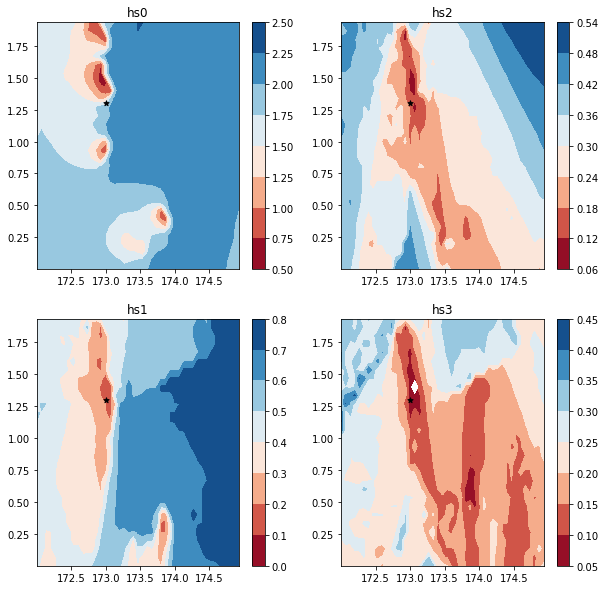

In [5]:

plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(1,0))
ax3 = plt.subplot2grid((2,2),(0,1))
ax4 = plt.subplot2grid((2,2),(1,1))

output1 = ax1.contourf(long_clipped,lat_clipped,var_dict['hs0']['array'][740,:,:],cmap='RdBu')
output2 = ax2.contourf(long_clipped,lat_clipped,var_dict['hs1']['array'][740,:,:],cmap='RdBu')
output3 = ax3.contourf(long_clipped,lat_clipped,var_dict['hs2']['array'][740,:,:],cmap='RdBu')
output4 = ax4.contourf(long_clipped,lat_clipped,var_dict['hs3']['array'][740,:,:],cmap='RdBu')

for ax in [ax1,ax2,ax3,ax4]:
    ax.scatter([173],[1.3],marker='*',s=30,c='k')

ax1.set_title('hs0')
ax2.set_title('hs1')
ax3.set_title('hs2')
ax4.set_title('hs3')
    
plt.colorbar(output1,ax=ax1)
plt.colorbar(output2,ax=ax2)
plt.colorbar(output3,ax=ax3)
plt.colorbar(output4,ax=ax4)

print('wave height')


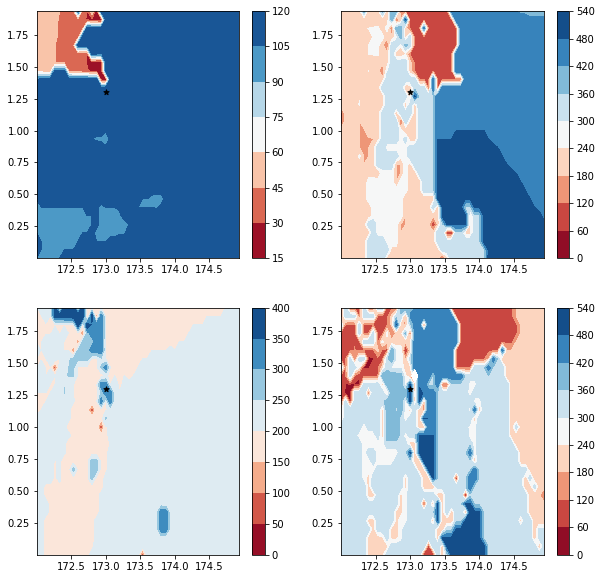

In [6]:

plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(1,0))
ax3 = plt.subplot2grid((2,2),(0,1))
ax4 = plt.subplot2grid((2,2),(1,1))

output1 = ax1.contourf(long_clipped,lat_clipped,var_dict['lp0']['array'][740,:,:],cmap='RdBu')
output2 = ax2.contourf(long_clipped,lat_clipped,var_dict['lp1']['array'][740,:,:],cmap='RdBu')
output3 = ax3.contourf(long_clipped,lat_clipped,var_dict['lp2']['array'][740,:,:],cmap='RdBu')
output4 = ax4.contourf(long_clipped,lat_clipped,var_dict['lp3']['array'][740,:,:],cmap='RdBu')

for ax in [ax1,ax2,ax3,ax4]:
    ax.scatter([173],[1.3],marker='*',s=30,c='k')

plt.colorbar(output1,ax=ax1)
plt.colorbar(output2,ax=ax2)
plt.colorbar(output3,ax=ax3)
plt.colorbar(output4,ax=ax4)



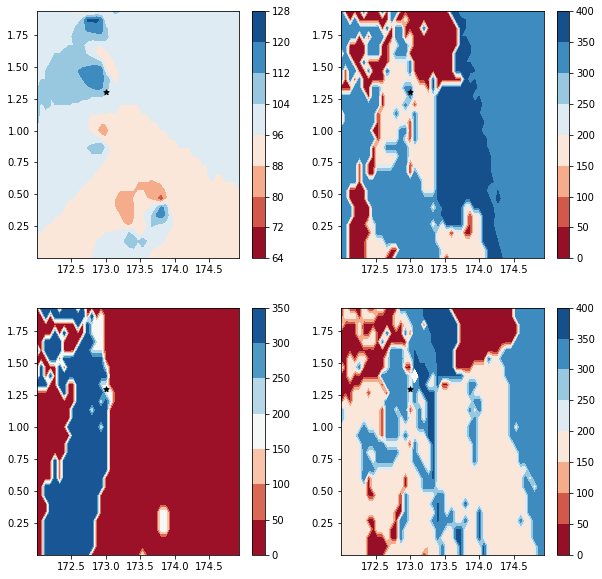

In [7]:

plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(1,0))
ax3 = plt.subplot2grid((2,2),(0,1))
ax4 = plt.subplot2grid((2,2),(1,1))

output1 = ax1.contourf(long_clipped,lat_clipped,var_dict['th0']['array'][740,:,:],cmap='RdBu')
output2 = ax2.contourf(long_clipped,lat_clipped,var_dict['th1']['array'][740,:,:],cmap='RdBu')
output3 = ax3.contourf(long_clipped,lat_clipped,var_dict['th2']['array'][740,:,:],cmap='RdBu')
output4 = ax4.contourf(long_clipped,lat_clipped,var_dict['th3']['array'][740,:,:],cmap='RdBu')

for ax in [ax1,ax2,ax3,ax4]:
    ax.scatter([173],[1.3],marker='*',s=30,c='k')

plt.colorbar(output1,ax=ax1)
plt.colorbar(output2,ax=ax2)
plt.colorbar(output3,ax=ax3)
plt.colorbar(output4,ax=ax4)

